In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Why Correlation Is Not Causation: A Confounder in Action

<AxesSubplot:xlabel='temps', ylabel='icecream_sales'>

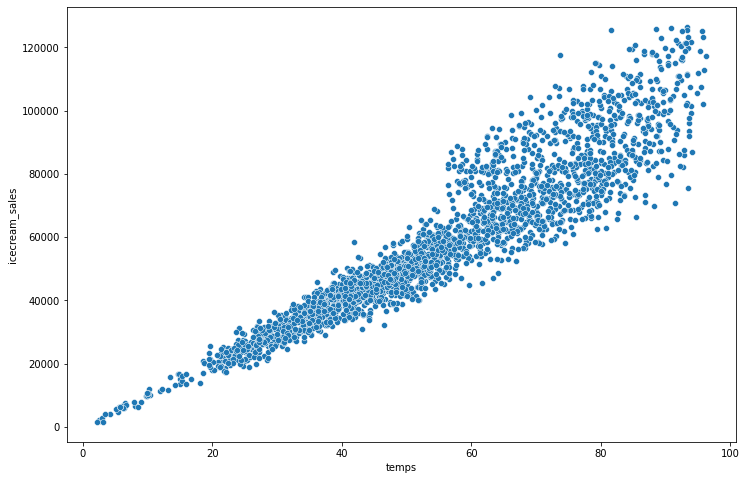

In [7]:
# Importing data
stand_df = pd.read_csv('chap1-stand_data.csv')

# Plotting ice-cream sales against temperature
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temps', y='icecream_sales', data=stand_df)

In [10]:
stand_df

,icecream_sales,iced_coffee_sales,summer_months,temps
0,25649.780754,28592.182276,0,28.593141
1,32694.928923,37152.842623,0,37.130641
2,26467.798121,24074.193453,0,24.111898
3,43438.793949,49169.465998,0,49.218075
4,52452.628396,47249.399498,0,47.257661
...,...,...,...,...
2395,20209.624001,23154.029478,0,23.168044
2396,24268.654284,23855.522674,0,23.884798
2397,38903.130952,32512.726857,0,32.487524
2398,20218.484894,22492.227998,0,22.466420


In [28]:
# Running linear regressions
# Biased model (coeff is 1,145 but should be 1,000)

# Create the OLS model and fit it to the data
model = smf.ols("icecream_sales ~ temps", data=stand_df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        21:38:07   Log-Likelihood:                -25183.
No. Observations:                2400   AIC:                         5.037e+04
Df Residuals:                    2398   BIC:                         5.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6169.8442    531.506    -11.608      0.0

### Too Many Variables Can Spoil the Broth

In [26]:
# Create the OLS model using the formula syntax
model = smf.ols(formula="icecream_sales ~ temps + summer_months + iced_coffee_sales", data=stand_df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        21:35:37   Log-Likelihood:                -24225.
No. Observations:                2400   AIC:                         4.846e+04
Df Residuals:                    2396   BIC:                         4.848e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.8271    374.58